In [40]:
print('fast ai vision.')

fast ai vision.


In [41]:

from fastai.vision import *


In [42]:
path = untar_data(URLs.MNIST_SAMPLE)
print(path)

/home/rong/.fastai/data/mnist_sample


In [43]:
data = ImageDataBunch.from_folder(path)


In [44]:
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/rong/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/rong/.fastai/data/mnist_sample;

Test: None

In [45]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [46]:
learn.fit(1)


epoch,train_loss,valid_loss,accuracy,time
0,0.149959,0.101129,0.965653,00:07


In [47]:
print(learn.layer_groups)

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU(inplace)
  (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace)
  (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [48]:
ds = data.train_ds
img,label = ds[0]
img

In [49]:
label

Category 7

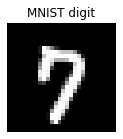

In [50]:
img.show(figsize=(2,2), title='MNIST digit')

In [51]:
img.rotate(35)

In [52]:
help(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



In [53]:
tfms = [rotate(degrees=(-20,20)), symmetric_warp(magnitude=(-0.3,0.3))]

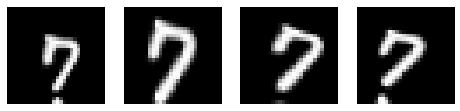

In [54]:
fig,axes = plt.subplots(1,4,figsize=(8,2))
for ax in axes:
    ds[0][0].apply_tfms(tfms).show(ax=ax)


In [55]:
data = ImageDataBunch.from_folder(path, ds_tfms=(tfms,[]))

In [56]:
print(data)


ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/rong/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/rong/.fastai/data/mnist_sample;

Test: None


In [57]:
learn=cnn_learner(data,models.resnet18, metrics=accuracy)
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.213793,0.114659,0.963690,00:08


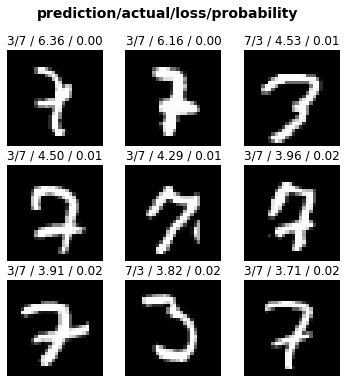

In [58]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(6,6))

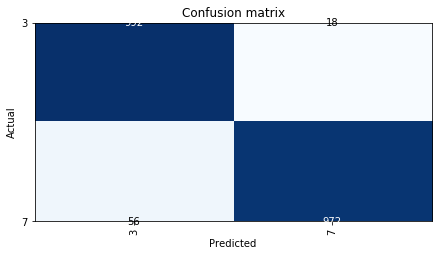

In [59]:
interp.plot_confusion_matrix()